# パーセプトロン
パーセプトロンとは、複数の入力を一つの出力に変換するもの

<img width="200" src="./images/Perceptron.png" >

※ ◯をニューロンといい、xは入力信号、wは重みを表す
ニューロンでは送られた信号の総和が計算され、限界値を超えた時に1(発火)を出力する。

$$
y =
        \begin{cases}
            0 \quad (w_1x_1) + (w_2x_2) <= 0 \\
            1 \quad (w_1x_1) + (w_2x_2) > 0 \\
        \end{cases}
$$

## ANDゲートの真理値表

| $ x_1 $ | $ x_2 $ | y |
| -- | -- | -- |
| 0 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

In [2]:
# ANDゲートのパーセプトロン実装

def AND(param_x1, param_x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = param_x1 * w1 + param_x2 * w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

AND(0, 0) # 0
AND(1, 0) # 0
AND(0, 1) # 0
AND(1, 1) # 1

def NAND(param_x1, param_x2):
    w1, w2, theta = -0.5, -0.5, -0.7
    tmp = param_x1 * w1 + param_x2 * w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

def OR(param_x1, param_x2):
    w1, w2, theta = 0.5, 0.5, 0.2
    tmp = param_x1 * w1 + param_x2 * w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

# 重みとバイアス

パーセプトロンに重みを足し、発火しやすさを調整する

$$
y =
        \begin{cases}
            0 \quad b + (w_1x_1) + (w_2x_2) <= 0 \\
            1 \quad b + (w_1x_1) + (w_2x_2) > 0 \\
        \end{cases}
$$

バイアスを追加した場合のAND関数は下記になる

In [3]:
def AND_with_bias(param_x1, param_x2):
    x = np.array([param_x1, param_x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

NANDとORはほぼ同じ実装になり、weightとbiasを調整するだけで済む

- NAND
    - w: `-0.5, -0.5`
    - b: `0.7`
- OR
    - w: `0.5, 0.5`
    - b: `-0.2`

しかしXORゲートはこのwightとbiasの調整だけでは実装出来ない。

## XORゲートの真理値表

| $ x_1 $ | $ x_2 $ | y |
| -- | -- | -- |
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

AND,OR,NANDは線形を表すがXORは非線形（曲線）を表すため、XORはwightとbiasだけでは実装出来ない。
そのため多層パーセプトロンという手法を取る
つまり

In [4]:
def XOR(param_x1, param_x2):
    s1 = NAND(param_x1, param_x2)
    s2 = OR(param_x1, param_x2)
    y = AND(s1, s2)
    return y

という関数になる。これをニューロンで表現すると下記になる

<img width="200" src="./images/XOR_Perceptron.png" >

多層パーセプトロンを用いると非線形も表現できるようになる

# 活性化関数

パーセプトロンをシンプルに表現すると下記の２つの式で表現できる

$$
y = h(b + w_1x_1 + w_2x_2)
$$

$$
h(x) = \begin{cases}
                0 & (x \leqq 0) \\
                1 & (x > 0)
        \end{cases}
$$

入力信号の総和が`h(x)`という関数によって変換され、その変換された総和が出力yになる。

こおｎ`h(x)`のことを活性化関数(activation function)と呼ばれる。

<img width="200" src="./images/ActivateF_Perceptron.png" >

# ステップ関数

入力が0を超えたら1を出力し、それ以外は0を出力する

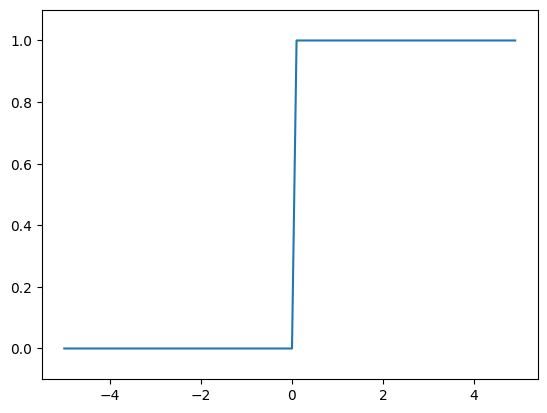

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int8)
    
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

# シグモイド関数とステップ関数

ステップ関数と違って、シグモイド関数は滑らかな曲線を描く。
ニューラルネットワークではこの滑らかさが重要な役割を果たし、パーセプトロンでは実現できない様々な表現が可能になる。
共通している点としては、入力が小さいほど0に近く、入力が大きいほど1に近づくという非線形関数の性質を持つ。

活性化関数では線形関数（一直線のもの）を用いてはいけない。
線形関数を用いると、ニューラルネットワークの層を深くすることの意味がなくなってしまう。
つまり隠れ層（中間層）がないネットワークと同じになってしまう。
例えば、 $ h(x)=cx $ を活性化関数とし $ y(x)=h(h(h(x))) $ という3層のネットワークを考える。
同じことを $ y(x)=c^3x $ という1層のネットワークで表現することが出来てしまうため、線形関数を用いることは出来ない。

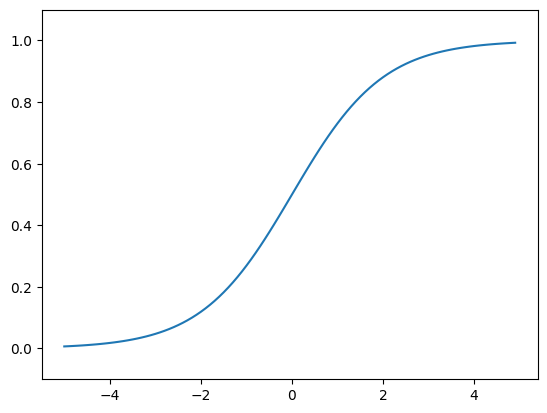

In [6]:
def sigmoid(param_x):
    return 1 / (1 + np.exp(-param_x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

import matplotlib.pyplot as plt
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y軸の範囲を指定
plt.show()

# ReLU(Rectified Linear Unit)関数
古くから使われる活性化関数関数としてReLUもある。
これは入力が0を超えていればそのまま出力し、0以下なら0とするものである
$$
h(x) =
        \begin{cases}
            x \quad x \geqq 0 \\
            0 \quad x < 0 \\
        \end{cases}
$$

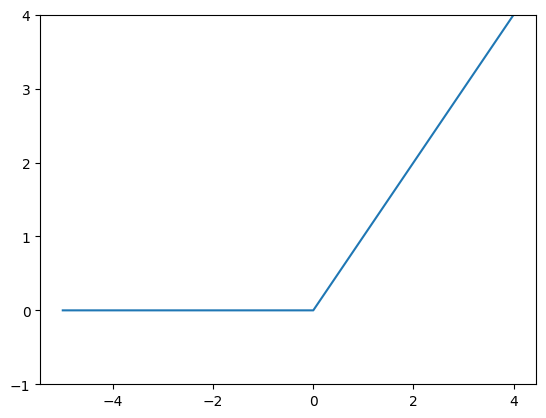

In [7]:
import numpy as np
def relu(param_x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 1)
y = relu(x)

import matplotlib.pyplot as plt
plt.plot(x, y)
plt.ylim(-1, 4) # y軸の範囲を指定
plt.show()

# ソフトマックス関数
ニューラルネットワークの出力層で用いる活性化関数で分類問題で使われる。
回帰問題では恒等関数（未加工で出力する関数）を用いられることが多い。

$$

y_k = \frac{\exp(a_k)}{\sum_{i=1}^{n}\exp(a_i)} \\
\\
= \frac{C\exp(a_k)}{C\sum_{i=1}^{n}\exp(a_i)}

$$

exp(x)は $ e^x $ を表す指数関数でeは[ネイピア数](https://ja.wikipedia.org/wiki/%E3%83%8D%E3%82%A4%E3%83%94%E3%82%A2%E6%95%B0) (2.7182...)である

In [8]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # prevent overflow
    sum_exp_a = np.sum(exp_a)
    return exp_a / sum_exp_a

a = np.array([1010, 1000, 990])

np.exp(a) / np.sum(np.exp(a)) # calc softmax with overflow

y = softmax(a) # calc softmax without overflow

print(y)

np.sum(y)

[9.99954600e-01 4.53978686e-05 2.06106005e-09]


/var/folders/c1/x6x0qdnj6x92nhzlw0v1y5wh0000gn/T/ipykernel_15476/2251101048.py:9: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a)) # calc softmax with overflow
/var/folders/c1/x6x0qdnj6x92nhzlw0v1y5wh0000gn/T/ipykernel_15476/2251101048.py:9: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a)) # calc softmax with overflow


1.0

# ソフトマックス関数の特徴

ソフトマックスの特徴として出力が0から1.0の実数になり総和が1になります。この性質のため出力を「確率」と解釈が出来る。
さらに各要素の大小関係はソフトマックス関数を適応してもしなくても変わらないため、ニューラルネットワークのクラス分類では一般的に出力の一番を起きいニューロンに相当するクラスだけを認識結果とする。
つまり他の要素はソフトマックス関数を適用する必要がなく、出力層のソフトマックス関数は省略することが出来る。

# MINISTデータセットを使った画像認識


In [9]:
import sys, os
sys.path.append(os.path.join(os.path.dirname(os.path.abspath('__file__')), './deep-learning-from-scratch/dataset/'))
from mnist import load_mnist

(x_train, t_train), (x_test, t_test)  = load_mnist(flatten=True, normalize=False)

print(x_train.shape) # 訓練画像
print(t_train.shape) # テスト画像
print(x_test.shape) # 訓練画像ラベル
print(t_test.shape) # テスト画像ラベル

import numpy as np
from PIL import Image

def img_show(image):
    pil_img = Image.fromarray(np.uint8(image))
    pil_img.show()

img = x_train[0]
label = t_train[0]

print(label)
print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

(60000, 784)
(60000,)
(10000, 784)
(10000,)
5
(784,)
(28, 28)


# 手書き画像の推論処理

MNISTデータセットに対して推論処理を行うネットワークを実装する。
ネットワーク入力層は784, 出力層を10ニューロンで構成する。
784=画像サイズの28×28、出力層10個=10クラス分類（数字の0~9）の意味である。

In [10]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    
    return x_test, t_test

def init_network():
    import pickle
    with open('deep-learning-from-scratch/ch03/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)

    return network

def predict(network, param_x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(param_x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 最も確率の高い要素のインデックスを取得
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy: ", str(float(accuracy_cnt) / len(x)))

Accuracy:  0.9352


# バッチ処理

入力データと重みパラメータの「形状」に注意して振り返る

In [11]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print("x.shape: ", x.shape) # (10000, 784) 10000行,784列
print("x[0].shape: ", x[0].shape) # (784,) 784列
print("W1.shape: ", W1.shape) # (784, 50) 784行,50列
print("W2.shape: ", W2.shape) # (50, 100) 50行,100列
print("W3.shape: ", W3.shape) # (100, 10) 100行,10列


x.shape:  (10000, 784)
x[0].shape:  (784,)
W1.shape:  (784, 50)
W2.shape:  (50, 100)
W3.shape:  (100, 10)


```
 X        W1         W2         W3      -> Y  
784  (784 × 50) (50 × 100) (100 × 10)     10  
 └──────┘    └────┘    └────┘      └──────┘  
    一致        一致      一致          一致  
```

※行列の積では対応する次元数を一致させる必要がある

これは画像１枚だけを入力したときの処理の流れだが、例えば100枚まとめてpredictしたい場合
```
     X            W1         W2         W3    -> Y
(100 × 784)  (784 × 50) (50 × 100) (100 × 10)   (100 × 10)
   │     └─────┘    └────┘    └──────┘     └──────┼─────┘
   └──────────────────────────────────────────────┘
```

このようなまとまりあるデータをバッチといいます。


In [12]:
# バッチ処理を使ったpredict

x, t = get_data()
network = init_network()

batch_size = 100 # バッチの数
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size] # 100個ずつ取り出す
    y_batch = predict(network, x_batch)
    # axis=1とは1次元目を軸に最大値を取得するという意味
    p = np.argmax(y_batch, axis=1) # 最も確率の高い要素のインデックスを取得
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy: ", str(float(accuracy_cnt) / len(x)))

Accuracy:  0.9352


# 機械学習のパラメータと特徴量

上で使ったweightをどうやって決めるか。手作業では大変すぎるので計算していきたい。このweightの数を*パラメータ*と言い、これらは*特徴量*を抽出することで可能になる。
画像の特徴量の場合は*ベクトル*が使われ、SIFTやSURF、HOGなどが有名。
ニューラルネットワークを用いると人を介在させずに学習させることが出来る。

ニューラルネットワークの学習では、訓練（教師）データとテストデータが必要になる。
また、一つのデータセット（例：特定の人の手書き画像）に対してのみ対応した状態を*過学習(overfitting)*という。

# 損失関数(loss function)

ニューラルネットワークの性能の悪さを示す指標。
一般には2乗和誤差や交差エントロピー誤差が用いられる。

## 2乗和誤差(sum of squared error)

$$
E = \frac{1}{2}\sum_{k}(y_k - t_k)^2
$$

$y_k$はニューラルネットワークの出力、$t_k$は教師データを、$k$はデータの次元数を表す。

`3.6手書き数字認識`の例では、$y_k$、$t_k$は下記のようなデータ。
```
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
```

実装すると下記のようになり、2のほうが誤差が少ないという結果になっている

In [13]:
import numpy as np
def sum_squared_error(param_y, param_t):
    return 0.5 * np.sum((param_y - param_t) ** 2)

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

print(np.array(y) - np.array(t))
print((np.array(y) - np.array(t)) ** 2)
result = sum_squared_error(np.array(y), np.array(t))
print("2の損失", result)

# あえて7を最も高い数値にしてみました
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
result = sum_squared_error(np.array(y), np.array(t))
print("7の損失", result)

[ 0.1   0.05 -0.4   0.    0.05  0.1   0.    0.1   0.    0.  ]
[0.01   0.0025 0.16   0.     0.0025 0.01   0.     0.01   0.     0.    ]
2の損失 0.09750000000000003
7の損失 0.5975


## 交差エントロピー誤差(cross entropy error)

$$
E = -\sum_{k}t_k\log y_k
$$

例えば、「２」が正解ラベルのインデックスであるとして、それに対応するニューラルネットワークの出力が0.6の場合、誤差は $-\log 0.6 = 0.51$となる。
交差エントロピー誤差は正解ラベルの出力$y_k$の結果によってその値が決まる

/var/folders/c1/x6x0qdnj6x92nhzlw0v1y5wh0000gn/T/ipykernel_15476/2982711806.py:4: RuntimeWarning: divide by zero encountered in log
  y = np.log(x)


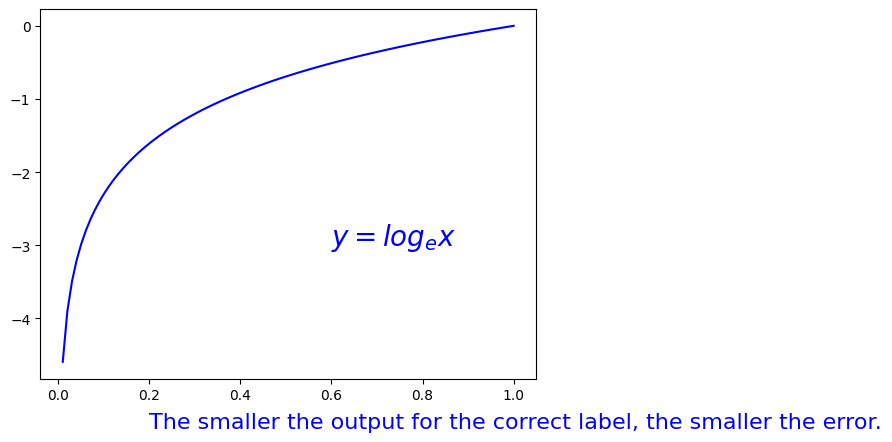

E= 0.510825457099338


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 1, 100)
y = np.log(x)

plt.plot(x,y, color="blue")
plt.text(0.6, -3, "$y=log_{e}x$", fontsize=20, color="blue")
plt.text(0, -5.5, "The smaller the output for the correct label, the smaller the error.", fontsize=16, color="blue")
plt.show()

def cross_entropy_error(pram_y, param_t):
    delta = 1e-7 # np.log(0)がマイナス無限大を表す -infとなるので、微小な値を足して0にしないようにする
    return -np.sum(param_t * np.log(pram_y + delta))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

E = cross_entropy_error(np.array(y), np.array(t))
print("E=", E)